In [58]:
import pandas as pd
from pathlib import Path
import numpy as np

In [59]:
#load data

file_path = Path("crypto_data.csv")
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


## Preprocessing

In [60]:
# removing "unnamed" column 

crypto_df = df.drop(columns = ['Unnamed: 0'])
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [61]:
# discard all currencies not bring traded
crypto_df = crypto_df.loc[crypto_df['IsTrading'] == True]
crypto_df.head(20)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
6,2015 coin,X11,True,PoW/PoS,NaN,0
7,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,True,PoW,1.076842e+08,0
9,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [62]:
# drop the IsTrading column

crypto_df = crypto_df.drop(columns = ['IsTrading'])
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365Coin,X11,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,PoW,NaN,611000
4,808,SHA-256,PoW/PoS,0.000000e+00,0


In [63]:
# remove all rows that have at least one null value

crypto_df = crypto_df.dropna()
crypto_df.head(20)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0
9,Litecoin,Scrypt,PoW,6.303924e+07,84000000
10,Dash,X11,PoW/PoS,9.031294e+06,22000000
11,Monero,CryptoNight-V7,PoW,1.720114e+07,0
12,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


In [64]:
# filter for currencies that have been mined (total mined > 0).

crypto_df = crypto_df.loc[crypto_df['TotalCoinsMined'] !=0]
crypto_df.head(20)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0
9,Litecoin,Scrypt,PoW,6.303924e+07,84000000
10,Dash,X11,PoW/PoS,9.031294e+06,22000000
11,Monero,CryptoNight-V7,PoW,1.720114e+07,0
12,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000
13,ZCash,Equihash,PoW,7.383056e+06,21000000


In [65]:
# remove coin name from df (do not contribute to analysis through machine learning)

crypto_df = crypto_df.drop(columns=['CoinName'])
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [66]:
# convert remaining features with text values (Algorithm and ProofType) into numerical data. Use Pandas to create dummies 

crypto_df=pd.get_dummies(crypto_df)
crypto_df.head()


,TotalCoinsMined,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
#standardize dataset so that columns that contain larger values do not unduly influence the outcome

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(crypto_df)
scaled_df = scaler.transform(crypto_df)

## Dimensionality Reduction

In [68]:
# use PCA to reduce dimensions to preserve 90% of explained variance in dimensionality reduction

from sklearn.decomposition import PCA
pca= PCA(n_components=.90)

In [69]:
# create dataframe with principal components

crypto_pca= pca.fit_transform(scaled_df)

pca_df = pd.DataFrame(crypto_pca)

pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,265,266,267,268,269,270,271,272,273,274
0,-0.266349,-0.117268,-7.338461e-16,9.340398e-15,0.029356,1.502408,-0.340030,0.094613,0.228034,-1.911487,...,-6.747401e-01,9.857211e-01,1.400653e+00,8.868834e-01,2.040480e+00,-2.774877e-01,-2.939899e+00,-1.548377e-01,7.780176e-01,2.840715e-01
1,-0.249164,-0.118242,1.245891e-15,9.274653e-15,0.025025,1.501418,-0.339939,0.094819,0.228669,-1.913496,...,2.174768e-01,9.083711e-01,8.472827e-01,2.121773e+00,-4.054113e-01,-2.734349e+00,-3.981581e-01,5.916704e-01,-2.852973e+00,1.890049e+00
2,0.314583,-0.003751,2.574784e-15,-3.837126e-15,-0.081491,2.488146,-0.411262,-0.369357,0.140466,-1.405410,...,1.092697e+00,-1.110685e+00,-2.747534e+00,-7.538544e-01,7.355368e-01,4.279600e+00,8.409602e-01,-9.248630e-01,-1.147214e+00,2.298268e+00
3,-0.248791,-0.222685,-6.813836e-15,1.879169e-14,0.000058,-1.568937,0.157593,-0.121180,-0.063010,0.362409,...,-4.052527e-16,5.349086e-16,-4.572403e-16,1.461290e-15,-9.357768e-16,-1.768831e-15,-2.074493e-15,-2.125698e-15,-2.458763e-15,-1.512651e-15
4,-0.117159,-0.223021,-5.695041e-15,2.188834e-14,-0.043412,-1.513777,0.138110,-0.073049,-0.096924,0.410963,...,5.086016e-16,4.995194e-16,9.871380e-16,-8.292962e-16,8.067473e-16,-1.703690e-15,1.321612e-15,-2.417737e-16,1.372974e-15,1.483212e-15


In [70]:
# number of columns was reduced by 104

In [71]:
# further reduce the dataset dimensions with t-SNE and visually inspect results. Run t-SNE on output of PCA tansformation

from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(pca_df)

tsne_features.shape

(533, 2)

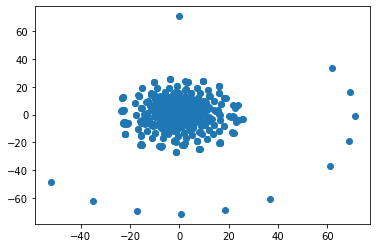

In [72]:
#create a scatterplot of t-SNE output. 

import matplotlib.pyplot as plt

pca_df['x'] = tsne_features[:,0]
pca_df['y'] = tsne_features[:,1]

plt.scatter(pca_df['x'], pca_df['y'])
plt.show()

## Cluster Analysis with k-Means

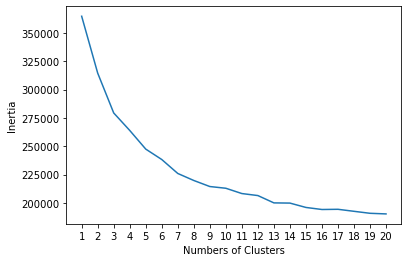

In [73]:
# create an elbow plot to identify the best number of clusters. Use a for-loop to determine inertia for each k between 
# 1-10


### The instructions were to use a range of 1-10, but i felt that a larger range was needed in order to make a 
# reasonable conclusion. The code for the 1-10 range is below, just commented out. 
from sklearn.cluster import KMeans

inertia = []
#k = list(range(1,11))
k = list(range(1,21))


for i in k:
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(pca_df)
    inertia.append(km.inertia_)
    
# define a DataFrame to plot Elbow Curve

elbow_data = {'k': k, 'inertia' : inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
#plt.xticks(range(1,11))
plt.xticks(range(1,21))
plt.xlabel('Numbers of Clusters')
plt.ylabel('Inertia')
plt.show()
    

## Recommendation

Due to the lack of what I would consider a "well-defined elbow" in the above graph, I would advise against attempting to cluster the cryptocurrencies. Initially, when looking at the graph in the 1-10 range, it looked like 8 clusters may have been a reasonable number of clusters (roughly the elbow of the graph), but after extending the range and seeing the fluctuation in inertia as the clusters increased, I believe there is too much uncertainty to group the currencies. 


